In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import (
    OneHotEncoder,
    MinMaxScaler,
    LabelEncoder,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import( accuracy_score,
                            precision_score,
                            recall_score,
                            f1_score,
                            confusion_matrix,
                            roc_curve,
                            roc_auc_score,
                            )

# Modeling
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso
)
from sklearn.model_selection import(
    train_test_split,
    RandomizedSearchCV,
    cross_val_score,
)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
traffic_df = pd.read_csv('/content/Traffic.csv')
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [ ]:
traffic_df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,16.000000,65.440692,12.161458,12.912970,18.646337,109.161458
std,8.945023,44.749335,11.537944,12.497736,10.973139,55.996312
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.750000,3.000000,2.000000,10.000000,54.000000
50%,16.000000,62.000000,9.000000,10.000000,18.000000,104.000000
75%,24.000000,103.000000,19.000000,20.000000,27.000000,153.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [ ]:
traffic_df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [ ]:
traffic_df.dtypes

Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object

In [ ]:
df_complete = traffic_df.copy()
df_1d = traffic_df.head(96) # it need in EDA latter!
df_1d

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
91,10:45:00 PM,10,Tuesday,11,0,1,33,45,normal
92,11:00:00 PM,10,Tuesday,11,2,2,40,55,normal
93,11:15:00 PM,10,Tuesday,11,1,0,31,43,normal
94,11:30:00 PM,10,Tuesday,9,2,1,20,32,normal


In [ ]:
traffic_df['midday'] = ''

for i in range(len(traffic_df['Time'])):

    if traffic_df['Time'][i][-2:] == 'AM':
        traffic_df.loc[i, 'midday'] = 'AM'

    elif traffic_df['Time'][i][-2:] == 'PM':
        traffic_df.loc[i, 'midday'] = 'PM'

# removing 'AM' or 'PM' form Time column
traffic_df['Time'] = traffic_df['Time'].str[:-2]

In [ ]:
traffic_df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,midday
0,12:00:00,10,Tuesday,13,2,2,24,41,normal,AM
1,12:15:00,10,Tuesday,14,1,1,36,52,normal,AM
2,12:30:00,10,Tuesday,10,2,2,32,46,normal,AM
3,12:45:00,10,Tuesday,10,2,2,36,50,normal,AM
4,1:00:00,10,Tuesday,11,2,1,34,48,normal,AM
...,...,...,...,...,...,...,...,...,...,...
5947,10:45:00,9,Thursday,16,3,1,36,56,normal,PM
5948,11:00:00,9,Thursday,11,0,1,30,42,normal,PM
5949,11:15:00,9,Thursday,15,4,1,25,45,normal,PM
5950,11:30:00,9,Thursday,16,5,0,27,48,normal,PM


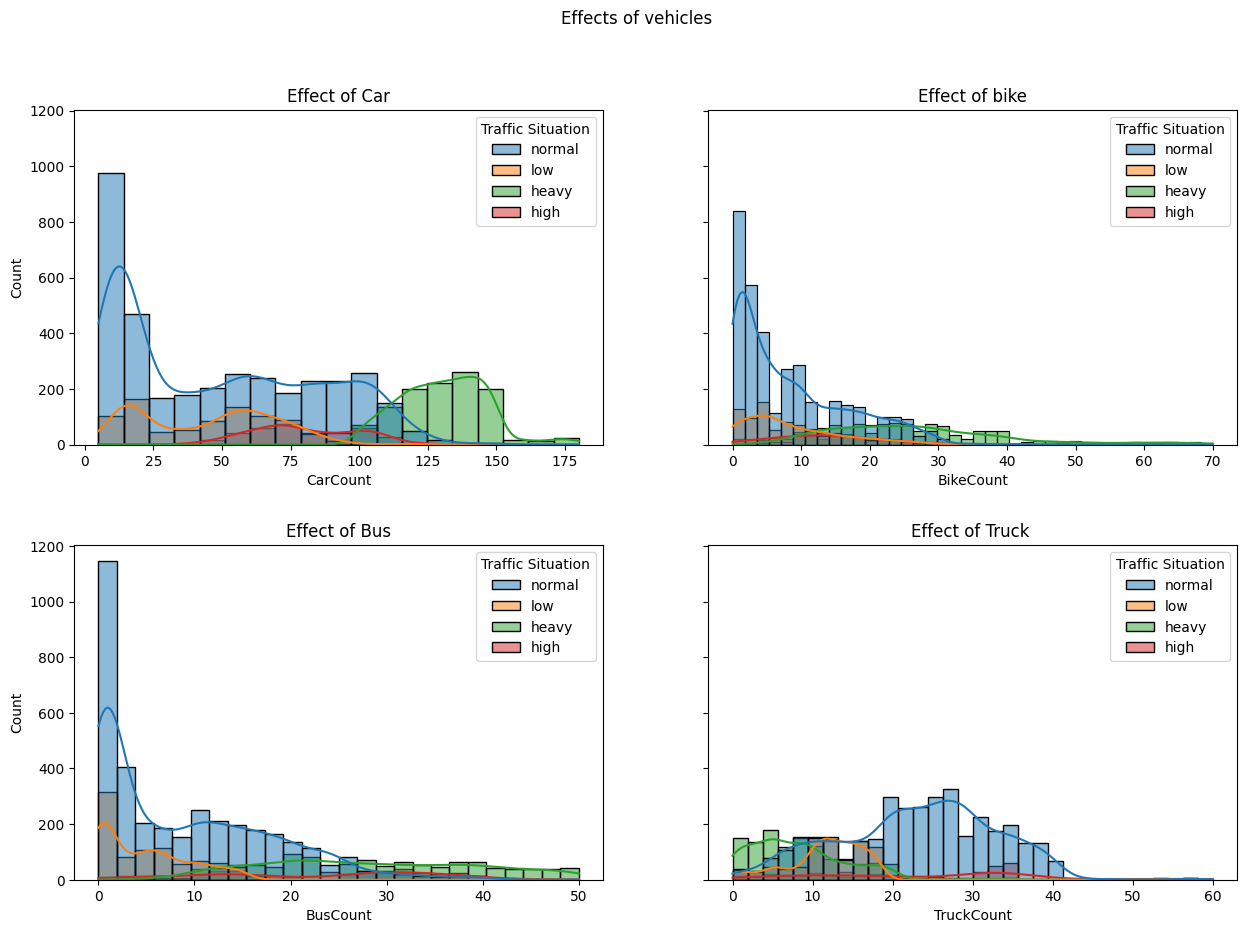

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Effects of vehicles')
# ------------- First-plot(1,1)
sns.histplot(traffic_df,x='CarCount',hue='Traffic Situation',kde=True,ax=axes[0,0])
axes[0,0].set_title('Effect of Car')
# ------------- Second-plot(1,2)
sns.histplot(traffic_df,x='BikeCount',hue='Traffic Situation',kde=True,ax=axes[0,1])
axes[0,1].set_title('Effect of bike')
# ------------- Third-plot(2,1)
sns.histplot(traffic_df,x='BusCount',hue='Traffic Situation',kde=True,ax=axes[1,0])
axes[1,0].set_title('Effect of Bus')
# ------------ Forth-plot(2,2)
sns.histplot(traffic_df,x='TruckCount',hue='Traffic Situation',kde=True,ax=axes[1,1])
axes[1,1].set_title('Effect of Truck ')
plt.subplots_adjust(hspace=0.3)
plt.show()


In [ ]:
hours = ['12:00','','','','1:00','','','','2:00','','','','3:00','','','','4:00','','','','5:00','','','','6:00','','','','7:00','','','','8:00','','','','9:00','','','','10:00','','','','11:00']

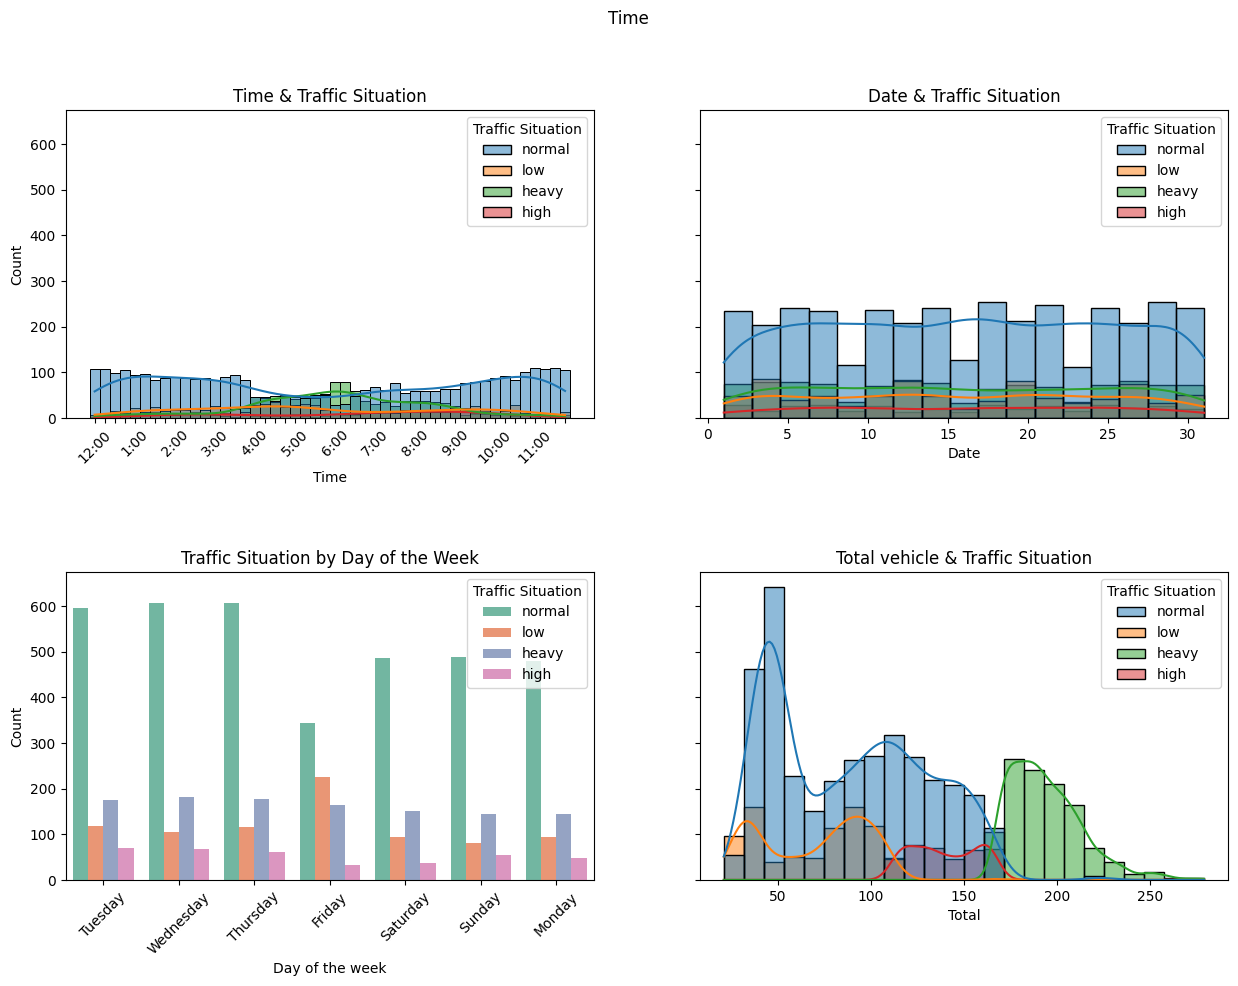

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Time')

sns.histplot(traffic_df, x='Time', hue='Traffic Situation', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Time & Traffic Situation')
axes[0, 0].set_xticklabels(hours, rotation=45)

sns.histplot(traffic_df, x='Date', hue='Traffic Situation', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Date & Traffic Situation')

sns.countplot(data=traffic_df, x="Day of the week", hue="Traffic Situation", palette="Set2", ax=axes[1, 0])
axes[1, 0].set_xlabel("Day of the week")
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_title("Traffic Situation by Day of the Week")
# Set the tick positions and labels
tick_positions = range(len(traffic_df['Day of the week'].unique()))
tick_labels = traffic_df['Day of the week'].unique()

# Set the tick positions and labels on the x-axis
axes[1, 0].set_xticks(tick_positions)
axes[1, 0].set_xticklabels(tick_labels, rotation=45)
# axes[1, 0].set_xticklabels(traffic_df['Day of the week'], rotation=45)

sns.histplot(traffic_df, x='Total', hue='Traffic Situation', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Total vehicle & Traffic Situation')

plt.subplots_adjust(hspace=0.5)
plt.show()

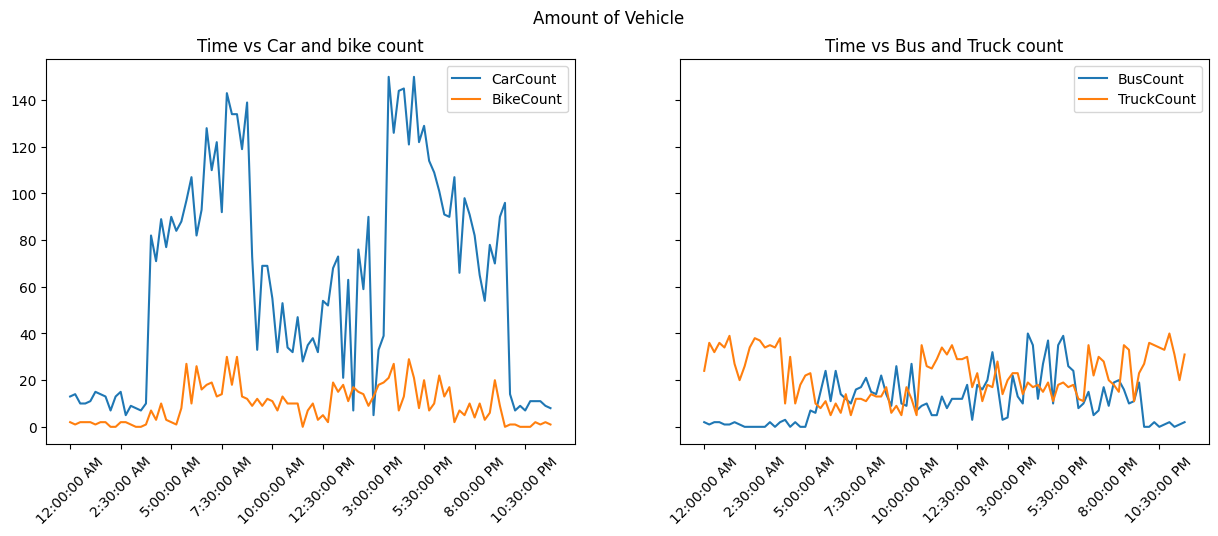

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Amount of Vehicle')
# -------------- First Plot (1,1)
axes[0].plot(df_1d['Time'], df_1d['CarCount'])
axes[0].plot(df_1d['Time'], df_1d['BikeCount'])
axes[0].legend(df_complete.columns[3:5])
axes[0].set_title('Time vs Car and bike count')
axes[0].set_xticks(df_1d['Time'][::10])  # Display every 10th label
axes[0].set_xticklabels(df_1d['Time'][::10], rotation=45)

# ------------- Second Plot (1,2)
axes[1].plot(df_1d['Time'], df_1d['BusCount'])
axes[1].plot(df_1d['Time'], df_1d['TruckCount'])
axes[1].set_title('Time vs Bus and Truck count')
axes[1].legend(df_complete.columns[5:7])
axes[1].set_xticks(df_1d['Time'][::10])  # Display every 10th label
axes[1].set_xticklabels(df_1d['Time'][::10], rotation=45)

plt.show()

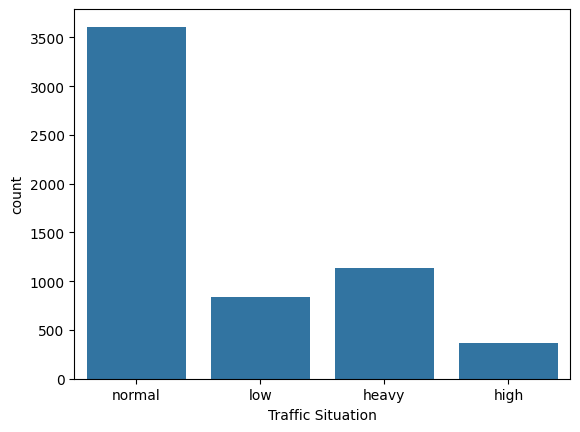

In [ ]:
sns.countplot(x='Traffic Situation', data=traffic_df)
plt.show()

In [ ]:
# Assuming 'Time' is the name of the column in your DataFrame
traffic_df['Time'] = pd.to_datetime(traffic_df['Time']).dt.hour * 3600 + \
                     pd.to_datetime(traffic_df['Time']).dt.minute * 60 + \
                     pd.to_datetime(traffic_df['Time']).dt.second
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,midday
0,43200,10,Tuesday,13,2,2,24,41,normal,AM
1,44100,10,Tuesday,14,1,1,36,52,normal,AM
2,45000,10,Tuesday,10,2,2,32,46,normal,AM
3,45900,10,Tuesday,10,2,2,36,50,normal,AM
4,3600,10,Tuesday,11,2,1,34,48,normal,AM


In [ ]:
traffic_df['Traffic Situation'].value_counts()

normal    3610
heavy     1137
low        834
high       371
Name: Traffic Situation, dtype: int64

In [ ]:
# Separate the features and target variable
features = traffic_df.drop(['Traffic Situation'], axis=1)
target = traffic_df['Traffic Situation']

In [ ]:
# Normalize the numeric features using MinMaxScaler
numeric_columns = ['Time', 'Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
scaler = MinMaxScaler()
features[numeric_columns] = scaler.fit_transform(features[numeric_columns])

In [ ]:
# Encode the categorical feature 'midday' using LabelEncoder
le = LabelEncoder()
features['midday'] = le.fit_transform(features['midday'])
features['Day of the week'] = le.fit_transform(features['Day of the week'])

# Encode the target variable 'Traffic Situation' using LabelEncoder
le_target = LabelEncoder()
target = le_target.fit_transform(target)

In [ ]:
# Concatenate the features and target variable
normalized_encoded_data = pd.concat([features, pd.Series(target, name='Traffic Situation')], axis=1)

In [ ]:
traffic_df = normalized_encoded_data
traffic_df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,midday,Traffic Situation
0,0.936170,0.300000,5,0.045714,0.028571,0.04,0.400000,0.077519,0,3
1,0.957447,0.300000,5,0.051429,0.014286,0.02,0.600000,0.120155,0,3
2,0.978723,0.300000,5,0.028571,0.028571,0.04,0.533333,0.096899,0,3
3,1.000000,0.300000,5,0.028571,0.028571,0.04,0.600000,0.112403,0,3
4,0.000000,0.300000,5,0.034286,0.028571,0.02,0.566667,0.104651,0,3
...,...,...,...,...,...,...,...,...,...,...
5947,0.829787,0.266667,4,0.062857,0.042857,0.02,0.600000,0.135659,1,3
5948,0.851064,0.266667,4,0.034286,0.000000,0.02,0.500000,0.081395,1,3
5949,0.872340,0.266667,4,0.057143,0.057143,0.02,0.416667,0.093023,1,3
5950,0.893617,0.266667,4,0.062857,0.071429,0.00,0.450000,0.104651,1,3


In [ ]:
#Spliting The Dataset to Train and Test

In [ ]:
X = traffic_df.drop('Traffic Situation', axis=1)
y = traffic_df['Traffic Situation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.values.shape


((4761, 9), (1191, 9), (4761,), (1191,))

In [ ]:
X_train

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,midday
4328,0.085106,0.766667,5,0.080000,0.028571,0.02,0.550000,0.131783,0
2644,0.000000,0.166667,1,0.051429,0.271429,0.44,0.250000,0.189922,1
642,0.297872,0.500000,1,0.582857,0.357143,0.76,0.233333,0.631783,1
5900,0.851064,0.266667,4,0.148571,0.128571,0.22,0.466667,0.224806,0
2177,0.276596,0.000000,6,0.645714,0.142857,0.26,0.266667,0.527132,1
...,...,...,...,...,...,...,...,...,...
3772,0.510638,0.566667,6,0.777143,0.214286,0.42,0.083333,0.624031,0
5191,0.063830,0.033333,4,0.034286,0.000000,0.00,0.266667,0.023256,0
5226,0.808511,0.033333,4,0.411429,0.328571,0.28,0.333333,0.437984,0
5390,0.212766,0.100000,2,0.080000,0.071429,0.02,0.633333,0.162791,0


In [ ]:
y_train

4328    3
2644    3
642     0
5900    3
2177    3
       ..
3772    0
5191    2
5226    3
5390    3
860     3
Name: Traffic Situation, Length: 4761, dtype: int64

In [ ]:
# Initial models test

In [ ]:
init_models = {
    'support vector linear' : SVR(kernel='linear'),
    'support vector kernel' : SVR(kernel= 'rbf'),
    'XGBOOST':XGBRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'LGBM' : LGBMRegressor()
}

In [ ]:
R2 = []
models_names = []
for i,(key,model) in enumerate(init_models.items()):
    model.fit(X_train,y_train)
    models_names.append(key)
    R2.append(np.mean(cross_val_score(model,X_train,y_train,cv=5)))
models_scores = pd.DataFrame({'model name':models_names,'R2 score':R2})
models_scores.head(7)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 634
[LightGBM] [Info] Number of data points in the train set: 4761, number of used features: 9
[LightGBM] [Info] Start training from score 2.153329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

,model name,R2 score
0,support vector linear,0.490140
1,support vector kernel,0.625704
2,XGBOOST,0.998098
3,Decision Tree,0.998249
4,Random Forest,0.997220
5,LGBM,0.994748


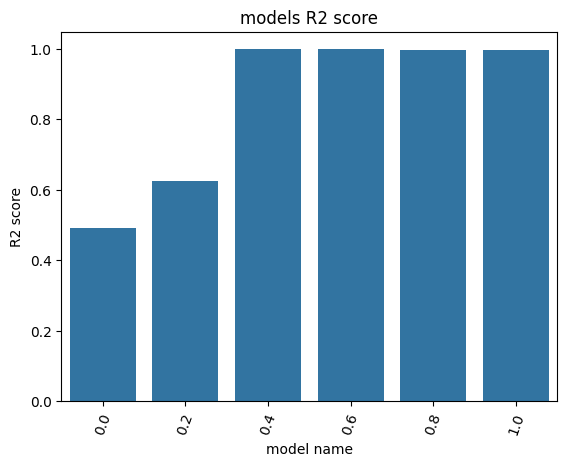

In [ ]:
# Plotting
fig, ax = plt.subplots()
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_title("models R2 score")
sns.barplot(data=models_scores, x='model name', y="R2 score")
plt.show()

In [ ]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
y_pred=model.predict(X_test)
y_pred_rounded = [int(round(pred)) for pred in y_pred]
y_test, y_pred_rounded

(4039    2
 4247    3
 1966    3
 4765    1
 1374    3
        ..
 944     3
 4731    0
 2254    3
 12      3
 1117    3
 Name: Traffic Situation, Length: 1191, dtype: int64,
 [3,
  1,
  3,
  1,
  1,
  3,
  1,
  2,
  3,
  2,
  1,
  2,
  3,
  1,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  2,
  0,
  2,
  2,
  0,
  1,
  3,
  2,
  2,
  2,
  3,
  1,
  2,
  2,
  3,
  2,
  1,
  2,
  1,
  3,
  1,
  3,
  2,
  1,
  2,
  2,
  2,
  2,
  3,
  2,
  1,
  3,
  1,
  2,
  2,
  1,
  3,
  2,
  0,
  1,
  3,
  1,
  1,
  2,
  1,
  1,
  2,
  1,
  1,
  3,
  1,
  3,
  3,
  0,
  2,
  3,
  2,
  1,
  2,
  3,
  3,
  3,
  1,
  3,
  1,
  3,
  1,
  2,
  2,
  3,
  2,
  0,
  1,
  3,
  2,
  3,
  3,
  1,
  2,
  3,
  3,
  1,
  3,
  3,
  3,
  3,
  3,
  0,
  0,
  3,
  2,
  2,
  3,
  0,
  2,
  2,
  0,
  3,
  1,
  1,
  1,
  2,
  1,
  3,
  1,
  1,
  3,
  1,
  1,
  0,
  0,
  1,
  2,
  2,
  3,
  2,
  1,
  1,
  3,
  1,
  1,
  3,
  0,
  1,
  2,
  0,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  1,
  2,
  3,
  3,
  2,
  2,
  2,
  2,


In [ ]:
svr_accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average='weighted')
recall = recall_score(y_test, y_pred_rounded, average='weighted')
f1 = f1_score(y_test, y_pred_rounded, average='weighted')
print(f'Accuracy: {svr_accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1}')

Accuracy: 0.5012594458438288
precision: 0.762844031133575
recall: 0.5012594458438288
f1_score: 0.5631230454121064


In [ ]:
cm = confusion_matrix(y_test, y_pred_rounded)
cm

array([[106, 107,   3,   0],
       [  1,  37,  40,   3],
       [  0,   0,  96,  50],
       [  1,  99, 290, 358]])

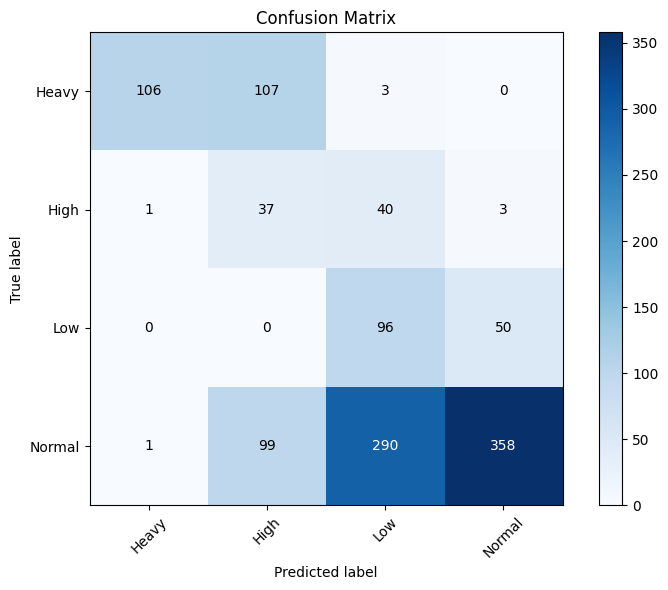

In [ ]:
def plot_confusion_matrix(confusion_matrix, classes):

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Show the plot
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Heavy', 'High', 'Low', 'Normal'])
plt.show()

In [ ]:
model1=SVR(kernel='rbf')
model1.fit(X_train, y_train)

SVR()

In [ ]:
y_pred=model1.predict(X_test)
y_pred_rounded = [int(round(pred)) for pred in y_pred]

In [ ]:
y_test, y_pred_rounded

(4039    2
 4247    3
 1966    3
 4765    1
 1374    3
        ..
 944     3
 4731    0
 2254    3
 12      3
 1117    3
 Name: Traffic Situation, Length: 1191, dtype: int64,
 [3,
  2,
  3,
  1,
  2,
  3,
  1,
  2,
  3,
  3,
  1,
  3,
  3,
  1,
  2,
  3,
  1,
  2,
  3,
  2,
  2,
  3,
  3,
  3,
  3,
  0,
  2,
  3,
  0,
  0,
  3,
  3,
  2,
  2,
  3,
  0,
  3,
  3,
  3,
  3,
  1,
  2,
  1,
  3,
  2,
  3,
  3,
  1,
  3,
  3,
  2,
  2,
  3,
  2,
  2,
  3,
  1,
  3,
  2,
  2,
  3,
  3,
  0,
  1,
  3,
  1,
  2,
  3,
  2,
  2,
  3,
  2,
  1,
  3,
  1,
  3,
  3,
  1,
  2,
  3,
  3,
  1,
  2,
  3,
  3,
  3,
  2,
  3,
  2,
  3,
  1,
  3,
  2,
  3,
  3,
  0,
  2,
  3,
  3,
  3,
  3,
  2,
  2,
  3,
  3,
  2,
  3,
  3,
  3,
  3,
  3,
  0,
  0,
  3,
  2,
  2,
  3,
  0,
  2,
  2,
  1,
  3,
  2,
  1,
  1,
  2,
  2,
  3,
  2,
  2,
  3,
  2,
  1,
  0,
  0,
  1,
  2,
  3,
  3,
  2,
  1,
  1,
  3,
  2,
  2,
  3,
  0,
  2,
  3,
  0,
  3,
  3,
  2,
  2,
  3,
  2,
  2,
  0,
  3,
  3,
  3,
  3,
  3,
  3,
  3,


In [ ]:
svr_accuracy1 = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average='weighted')
recall = recall_score(y_test, y_pred_rounded, average='weighted')
f1 = f1_score(y_test, y_pred_rounded, average='weighted')
print(f'Accuracy: {svr_accuracy1}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1}')

Accuracy: 0.5642317380352645
precision: 0.7183363517179192
recall: 0.5642317380352645
f1_score: 0.6118761917574331


In [ ]:
cm = confusion_matrix(y_test, y_pred_rounded)
cm

array([[  0,   0,   0,   0,   0],
       [ 14,  93, 100,   9,   0],
       [  0,   0,  16,  36,  29],
       [  0,   0,   0,  57,  89],
       [  0,   1,  19, 222, 506]])

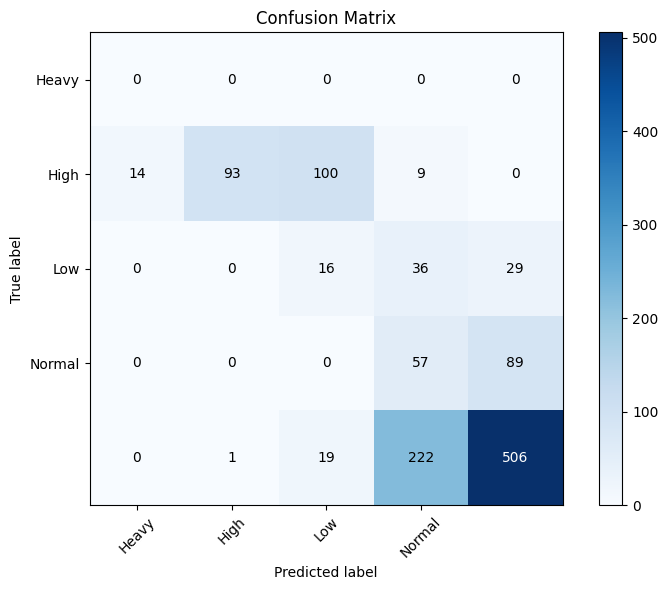

In [ ]:
def plot_confusion_matrix(confusion_matrix, classes):

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Show the plot
    plt.show()
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Heavy', 'High', 'Low', 'Normal'])
plt.show()

In [ ]:
modelr = RandomForestRegressor()
modelr.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred=modelr.predict(X_test)
y_pred_rounded = [int(round(pred)) for pred in y_pred]
y_test, y_pred_rounded

(4039    2
 4247    3
 1966    3
 4765    1
 1374    3
        ..
 944     3
 4731    0
 2254    3
 12      3
 1117    3
 Name: Traffic Situation, Length: 1191, dtype: int64,
 [2,
  3,
  3,
  1,
  3,
  3,
  0,
  2,
  3,
  3,
  1,
  3,
  3,
  0,
  2,
  3,
  0,
  3,
  3,
  3,
  3,
  3,
  3,
  2,
  3,
  0,
  2,
  1,
  0,
  0,
  3,
  1,
  3,
  1,
  3,
  0,
  2,
  3,
  3,
  3,
  0,
  3,
  0,
  2,
  3,
  3,
  3,
  1,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  2,
  0,
  3,
  1,
  1,
  3,
  3,
  0,
  0,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  0,
  3,
  0,
  3,
  3,
  0,
  3,
  3,
  2,
  0,
  3,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  0,
  2,
  3,
  3,
  3,
  0,
  3,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  0,
  0,
  3,
  3,
  3,
  2,
  0,
  1,
  3,
  0,
  3,
  3,
  0,
  3,
  2,
  3,
  3,
  1,
  3,
  2,
  1,
  3,
  0,
  0,
  0,
  2,
  3,
  3,
  3,
  3,
  0,
  3,
  3,
  3,
  3,
  0,
  1,
  1,
  0,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  0,
  3,
  3,
  3,
  1,
  3,
  3,
  3,


In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average='weighted')
recall = recall_score(y_test, y_pred_rounded, average='weighted')
f1 = f1_score(y_test, y_pred_rounded, average='weighted')
print(f'Accuracy: {rf_accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1}')

Accuracy: 0.9974811083123426
precision: 0.997476324702845
recall: 0.9974811083123426
f1_score: 0.9974747184840096


In [ ]:
cm = confusion_matrix(y_test, y_pred_rounded)
cm

array([[216,   0,   0,   0],
       [  0,  79,   1,   1],
       [  0,   0, 146,   0],
       [  0,   1,   0, 747]])

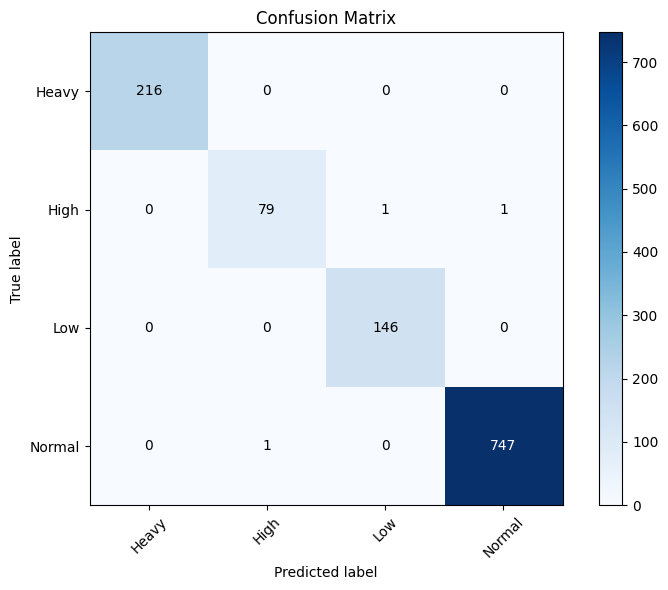

In [ ]:
def plot_confusion_matrix(confusion_matrix, classes):

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Show the plot
    plt.show()
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Heavy', 'High', 'Low', 'Normal'])
plt.show()

In [ ]:
modelx=XGBRegressor()
modelx.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=modelx.predict(X_test)
y_pred_rounded = [int(round(pred)) for pred in y_pred]

In [ ]:
xgb_accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average='weighted')
recall = recall_score(y_test, y_pred_rounded, average='weighted')
f1 = f1_score(y_test, y_pred_rounded, average='weighted')
print(f'Accuracy: {xgb_accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1}')

Accuracy: 0.9974811083123426
precision: 0.9974856960814464
recall: 0.9974811083123426
f1_score: 0.9974816986903108


In [ ]:
cm = confusion_matrix(y_test, y_pred_rounded)
cm

array([[216,   0,   0,   0],
       [  0,  80,   0,   1],
       [  0,   0, 146,   0],
       [  0,   1,   1, 746]])

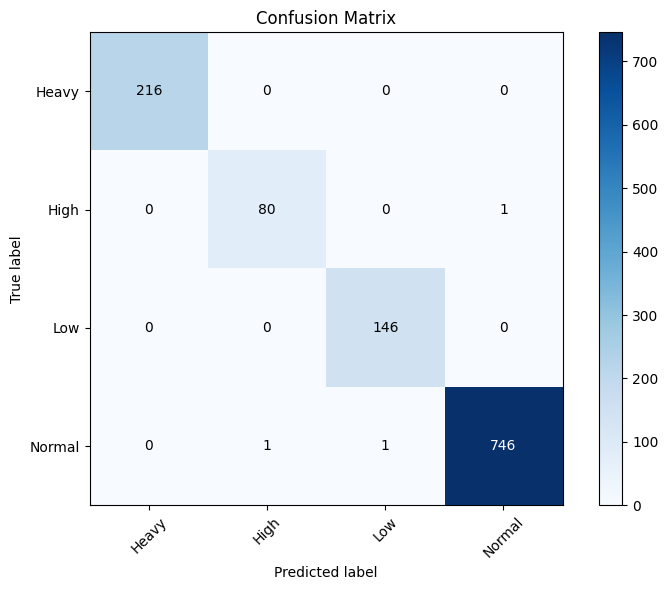

In [ ]:
def plot_confusion_matrix(confusion_matrix, classes):
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Show the plot
    plt.show()
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Heavy', 'High', 'Low', 'Normal'])
plt.show()

In [ ]:
modell=LGBMRegressor()
modell.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 634
[LightGBM] [Info] Number of data points in the train set: 4761, number of used features: 9
[LightGBM] [Info] Start training from score 2.153329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

LGBMRegressor()

In [ ]:
y_pred=modell.predict(X_test)
y_pred_rounded = [int(round(pred)) for pred in y_pred]

In [ ]:
lgbm_accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average='weighted')
recall = recall_score(y_test, y_pred_rounded, average='weighted')
f1 = f1_score(y_test, y_pred_rounded, average='weighted')
print(f'Accuracy: {lgbm_accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1}')

Accuracy: 0.9958018471872376
precision: 0.9958701513106385
recall: 0.9958018471872376
f1_score: 0.9958024251376503


In [ ]:
cm = confusion_matrix(y_test, y_pred_rounded)
cm

array([[216,   0,   0,   0],
       [  0,  78,   3,   0],
       [  0,   0, 146,   0],
       [  0,   1,   1, 746]])

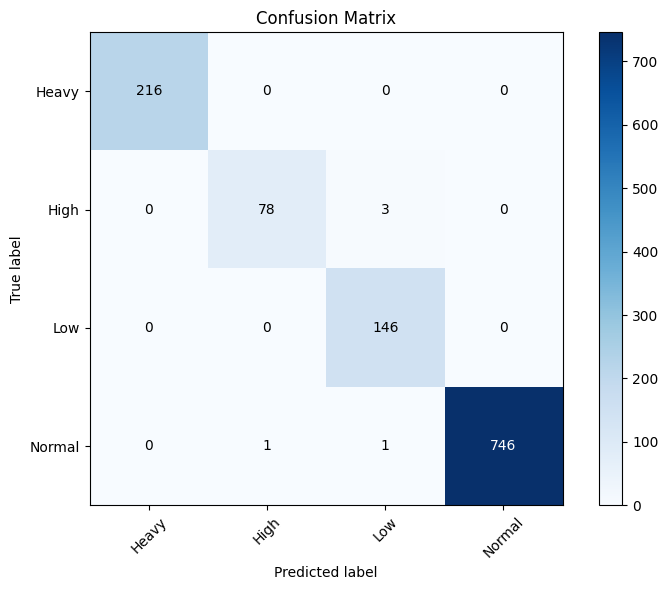

In [ ]:
def plot_confusion_matrix(confusion_matrix, classes):

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Show the plot
    plt.show()
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Heavy', 'High', 'Low', 'Normal'])
plt.show()

In [ ]:
modeldt=DecisionTreeRegressor()
modeldt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=modeldt.predict(X_test)
y_pred_rounded = [int(round(pred)) for pred in y_pred]

In [ ]:
dt_accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average='weighted')
recall = recall_score(y_test, y_pred_rounded, average='weighted')
f1 = f1_score(y_test, y_pred_rounded, average='weighted')
print(f'Accuracy: {dt_accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1}')

Accuracy: 0.998320738874895
precision: 0.998320738874895
recall: 0.998320738874895
f1_score: 0.998320738874895


In [ ]:
cm = confusion_matrix(y_test, y_pred_rounded)
cm

array([[216,   0,   0,   0],
       [  0,  80,   0,   1],
       [  0,   0, 146,   0],
       [  0,   1,   0, 747]])

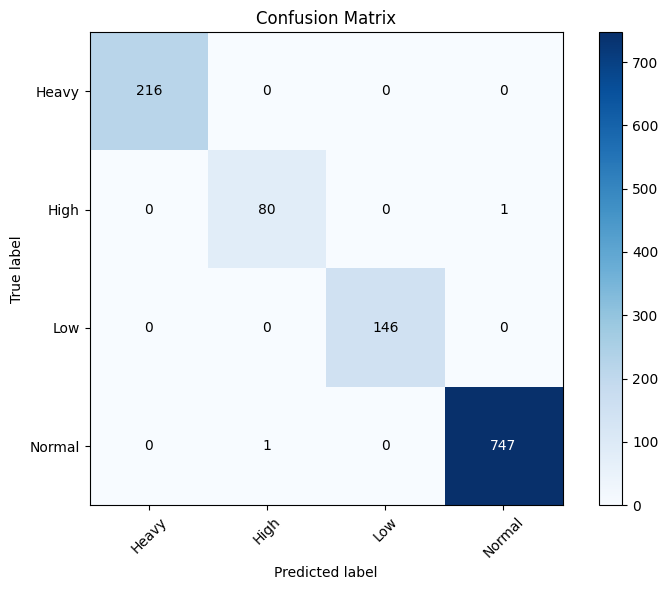

In [ ]:
def plot_confusion_matrix(confusion_matrix, classes):

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Show the plot
    plt.show()
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Heavy', 'High', 'Low', 'Normal'])
plt.show()

In [ ]:
X_test

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,midday
4039,0.063830,0.666667,3,0.080000,0.014286,0.00,0.233333,0.050388,0
4247,0.404255,0.733333,1,0.640000,0.142857,0.20,0.300000,0.519380,0
1966,0.893617,0.966667,1,0.268571,0.100000,0.02,0.433333,0.251938,0
4765,0.191489,0.900000,2,0.428571,0.371429,0.70,0.100000,0.488372,1
1374,0.553191,0.766667,5,0.565714,0.242857,0.46,0.083333,0.496124,0
...,...,...,...,...,...,...,...,...,...
944,0.595745,0.600000,4,0.308571,0.100000,0.28,0.466667,0.337209,1
4731,0.489362,0.900000,2,0.714286,0.442857,0.44,0.000000,0.627907,0
2254,0.893617,0.033333,4,0.234286,0.085714,0.22,0.583333,0.298450,0
12,0.170213,0.300000,5,0.022857,0.014286,0.00,0.566667,0.089147,0


In [ ]:
print(f'SVL Accuracy: {svr_accuracy}')
print(f'SVK Accuracy: {svr_accuracy1}')
print(f'Random forest Accuracy: {rf_accuracy}')
print(f'XGB Accuracy: {xgb_accuracy}')
print(f'LGBM Accuracy: {lgbm_accuracy}')
print(f'Decision Tree Accuracy: {dt_accuracy}')

SVL Accuracy: 0.5012594458438288
SVK Accuracy: 0.5642317380352645
Random forest Accuracy: 0.9974811083123426
XGB Accuracy: 0.9974811083123426
LGBM Accuracy: 0.9958018471872376
Decision Tree Accuracy: 0.998320738874895


Text(0, 0.5, 'Accuracies')

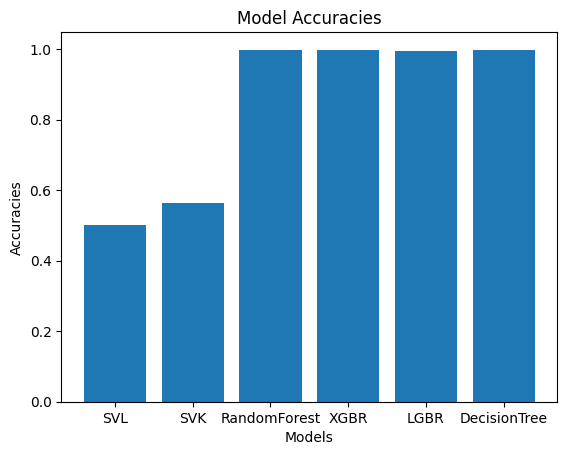

In [ ]:
accuracy_list = []
accuracy_list.append(svr_accuracy)
accuracy_list.append(svr_accuracy1)
accuracy_list.append(rf_accuracy)
accuracy_list.append(xgb_accuracy)
accuracy_list.append(lgbm_accuracy)
accuracy_list.append(dt_accuracy)
Model_name=['SVL','SVK','RandomForest','XGBR','LGBR','DecisionTree']
plt.bar(Model_name,accuracy_list)
plt.title("Model Accuracies")
plt.xlabel("Models")
plt.ylabel("Accuracies")